***Importing files*** 

In [0]:
from google.colab import files
upload=files.upload()


Saving Churn_Modelling.csv to Churn_Modelling.csv


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


***EDA***

In [0]:
data=pd.read_csv("Churn_Modelling.csv")
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [0]:
data.shape

(10000, 14)

In [0]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [0]:
data[data==0].count()

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure              413
Balance            3617
NumOfProducts         0
HasCrCard          2945
IsActiveMember     4849
EstimatedSalary       0
Exited             7963
dtype: int64

In [0]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [0]:
data['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [0]:
X1=data.drop(['RowNumber','CustomerId','Surname','Exited'],axis=1)


In [0]:
y1=data['Exited']

***Label Encoding***



In [0]:
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()

for i in X1.columns:
    if isinstance(X1[i][0], str):
            X1[i] = encoder.fit_transform(X1[i])

In [0]:
X1.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10


****train_test_split****

In [0]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X1,y1,test_size=.2, random_state = 132)

**Standardization**

In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [0]:
import keras 
from keras.models import Sequential
from keras.layers import Dense


***Keras Model***

In [0]:
cls=Sequential()

cls.add(Dense(output_dim=5,init='uniform',activation='relu',input_dim=10))

cls.add(Dense(output_dim=5,init='uniform',activation='relu'))

cls.add(Dense(output_dim=1,init='uniform',activation='sigmoid'))

cls.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=10, units=5, kernel_initializer="uniform")`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=5, kernel_initializer="uniform")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  import sys


In [0]:
cls.fit(x_train,y_train,batch_size=20,epochs=100)

In [0]:
y_pred=cls.predict(x_test)
y_pred


array([[0.05558684],
       [0.29549813],
       [0.12608221],
       ...,
       [0.05421615],
       [0.01311821],
       [0.01523107]], dtype=float32)

In [0]:
y_pred=(y_pred>0.5)
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

***accuracy_score & confusion_matrix***

In [0]:
from sklearn.metrics import accuracy_score, confusion_matrix
confusion_matrix(y_test,y_pred)

array([[1561,   46],
       [ 268,  125]])

In [0]:
accuracy_score(y_test,y_pred)*100

84.3

**Visualization**

Train on 8000 samples, validate on 2000 samples
Epoch 1/10
8000/8000 [==============================] - 1s 113us/step - loss: 0.4036 - acc: 0.8341 - val_loss: 0.3860 - val_acc: 0.8420
Epoch 2/10
8000/8000 [==============================] - 1s 108us/step - loss: 0.4037 - acc: 0.8346 - val_loss: 0.3870 - val_acc: 0.8405
Epoch 3/10
8000/8000 [==============================] - 1s 109us/step - loss: 0.4035 - acc: 0.8332 - val_loss: 0.3864 - val_acc: 0.8395
Epoch 4/10
8000/8000 [==============================] - 1s 110us/step - loss: 0.4038 - acc: 0.8345 - val_loss: 0.3856 - val_acc: 0.8405
Epoch 5/10
8000/8000 [==============================] - 1s 108us/step - loss: 0.4037 - acc: 0.8336 - val_loss: 0.3877 - val_acc: 0.8405
Epoch 6/10
8000/8000 [==============================] - 1s 108us/step - loss: 0.4036 - acc: 0.8332 - val_loss: 0.3872 - val_acc: 0.8395
Epoch 7/10
8000/8000 [==============================] - 1s 109us/step - loss: 0.4041 - acc: 0.8320 - val_loss: 0.3862 - val_acc: 0.8400


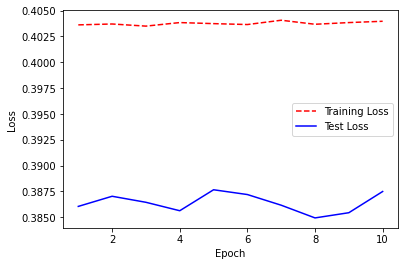

In [0]:
history = cls.fit(x_train, y_train, validation_data=(x_test,y_test), batch_size=32, epochs=10, verbose=1)

# Get training and test loss histories
training_loss = history.history['loss']
test_loss = history.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

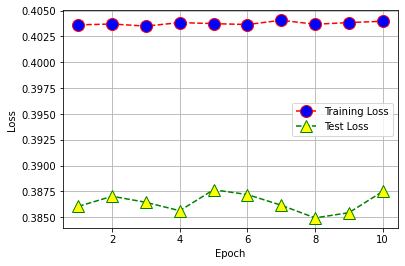

In [0]:
# Visualize loss history
plt.plot(epoch_count, training_loss,marker='o',markerfacecolor='blue',markersize=12,linestyle='dashed',color='red')
plt.plot(epoch_count, test_loss,marker='^',markerfacecolor='yellow',markersize=12,linestyle='dashed',color='green')
plt.legend(['Training Loss', 'Test Loss'])
plt.grid(True)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

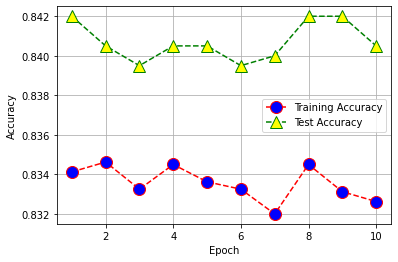

In [0]:
Training_Accuracy = history.history['acc']
Test_Accuracy= history.history['val_acc']

# Visualize loss history
plt.plot(epoch_count, Training_Accuracy,marker='o',markerfacecolor='blue',markersize=12,linestyle='dashed',color='red')
plt.plot(epoch_count, Test_Accuracy,marker='^',markerfacecolor='yellow',markersize=12,linestyle='dashed',color='green')
plt.legend(['Training Accuracy', 'Test Accuracy'])
plt.grid(True)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()